In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap('Pastel1')
import seaborn as sns
import random


N = 240
V = 441
x1 = 21
x2 = 21
nsrcs = 6


<Figure size 432x288 with 0 Axes>

## Question 1.1

In [2]:
# Question 1.1

AV = np.array([0,20,0,0,0,0])
IV = np.array([30,45,60,40,40,40])
ONES = np.array([15,20,25,15,20,25])

In [3]:
TC = np.zeros((nsrcs,N))

for x in range(nsrcs):
    i = 0
    while i < N and i+ONES[x] < N:
        if i == 0:
            i += AV[x]

        TC[x][i:i+ONES[x]] = 1
        i += IV[x]

In [4]:
for x in range(nsrcs):
    print(np.mean(TC[x]))
    TC[x] = (TC[x] - np.mean(TC[x])) / np.std(TC[x])

0.5
0.4166666666666667
0.4166666666666667
0.375
0.5
0.625


In [ ]:
for i in range(6):
    plt.plot(TC[i])
    plt.savefig(f"plots/1.1_{i}.png")
    plt.show()

## Question 1.2

In [ ]:
sns.heatmap(np.corrcoef(TC))
plt.savefig(f"plots/1.2.png")
plt.show()

In [ ]:
print(np.corrcoef(TC)[3][4])
print(np.corrcoef(TC)[4][5])

In [ ]:
np.corrcoef(TC)

## Question 1.3

In [5]:
def construct_tmpSM(vx, vy, hx, hy):
    tmpsm = np.zeros((x1,x2))
    for i in range(len(tmpsm[vx:vy+1])):
        tmpsm[vx:vy+1][i][hx:hy+1] = 1
    return tmpsm
    

In [41]:
tmpSM = []

tmpSM.append(construct_tmpSM(2,6,2,6))
tmpSM.append(construct_tmpSM(2,6,15,19))
tmpSM.append(construct_tmpSM(8,13,2,6))
tmpSM.append(construct_tmpSM(8,13,15,19))
tmpSM.append(construct_tmpSM(15,19,2,6))
tmpSM.append(construct_tmpSM(15,19,15,19))

In [45]:
def plotSM(data, i):
    fig, ax = plt.subplots()
    sns.heatmap(data, ax=ax)
    ax.set_xlim(1,21)
    ax.set_ylim(21,1)
    plt.savefig(f"plots/1.3_{i}.png")
    plt.show()

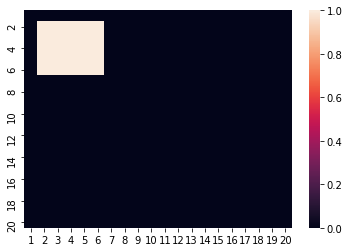

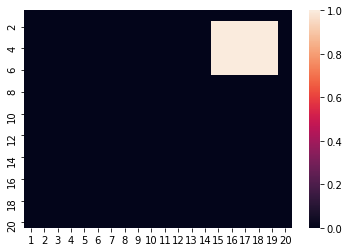

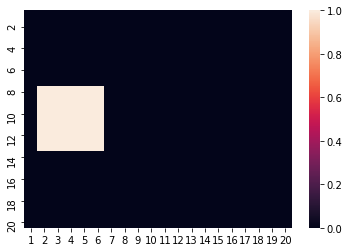

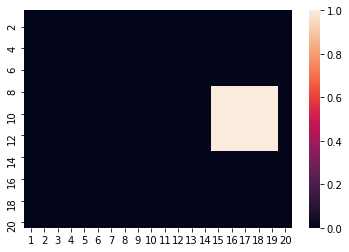

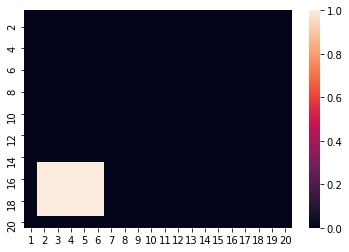

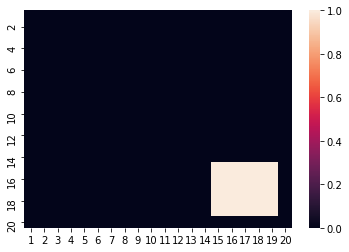

In [46]:
for i in range(6):
    plotSM(tmpSM[i], i)

In [ ]:
# # bruh = np.array(tmpSM).swapaxes(1,2)
# x,y,z = np.array(tmpSM).shape
# # b = a.T #Transpose - get the indices grouped along the other axis
# # b = b.reshape(y, x, z)
# bruh = np.array(tmpSM).T
# bruh = bruh.reshape(y,x,z)

In [7]:

# bruh = np.array(tmpSM)
# SM = np.reshape(bruh, (6,441))

SM = np.reshape(tmpSM, (6,441))

In [42]:
test_SM = np.zeros((6,441))

for i in range(6):
    test_SM[i] = (SM[i] - np.mean(SM[i])) / np.std(SM[i])

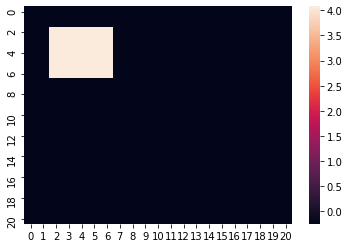

In [43]:
sns.heatmap(np.reshape(test_SM[0], (21, 21)))
plt.show()

In [ ]:
len(tmpSM)

In [ ]:
sns.heatmap(np.corrcoef(SM))
plt.savefig(f"plots/1.3_CM.png")
plt.show()

## Question 1.4

In [8]:
Gt = np.random.normal(0, np.sqrt(0.25), (240,6))
Gs = np.random.normal(0, np.sqrt(0.015), (6,441))

In [ ]:
sns.heatmap(np.corrcoef(np.transpose(Gt)))
plt.savefig(f"plots/1.4_Gt.png")
plt.show()
sns.heatmap(np.corrcoef(Gs))
plt.savefig(f"plots/1.4_Gs.png")
plt.show()

In [ ]:
# sns.displot(Ga, legend=False)
# plt.show()
# sns.displot(Gt, legend=False)
# plt.show()

sns.distplot(Gt)
plt.savefig(f"plots/1.4_distGt.png")
plt.show()
sns.distplot(Gs)
plt.savefig(f"plots/1.4_distGs.png")
plt.show()

In [47]:
what = np.matmul(Gt, Gs)

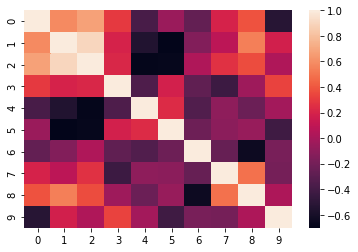

In [53]:
sns.heatmap(np.corrcoef(what.T[:10]))
plt.savefig(f"plots/1.4_CM.png")
plt.show()

## Question 1.5

In [9]:
X = np.matmul(np.transpose(TC) + Gt, SM + Gs)

In [ ]:
X.shape

In [ ]:
import random

random.seed(1)

a = random.sample(range(V), 100)

for i in a:
    sns.lineplot(data = np.transpose(np.transpose(X)[i]), dashes=False, palette = 'rainbow', alpha=0.4)
plt.tight_layout()
plt.savefig(f"plots/1.5_timeseries.png")
# plt.legend(a)
plt.show()


In [ ]:
varX = []
for i in range(len(np.transpose(X))):
    varX.append(np.var(np.transpose(X)[i]))


In [ ]:
plt.plot(varX)
plt.savefig(f"plots/1.5_varX.png")
plt.show()

In [ ]:
# # Standardise
# for i in range(len(X)):
#     X[i] = (X[i] - np.mean(X[i])) / np.std(X[i])

In [10]:
# Standardise
X = np.transpose(X)
for j in range(441):
    X[j] = (X[j] - np.mean(X[j])) / np.std(X[j])
X = np.transpose(X)

In [ ]:
X

## Question 2.1

In [11]:
D = np.transpose(TC)
Dt = np.transpose(D)

A_lsr = abs(np.matmul(np.matmul(np.linalg.inv(np.matmul(Dt, D)), Dt), X))
D_lsr = np.matmul(X,np.transpose(A_lsr))

In [ ]:
np.mean(A_lsr)

In [ ]:
len(A_lsr[0]) 

In [ ]:
for i in range(6):
    sns.heatmap(np.reshape(A_lsr[i], (21, 21)))
    plt.savefig(f"plots/2.1_{i}_Alsr.png")
    plt.show()

In [ ]:
for i in range(6):
    plt.plot(np.transpose(D_lsr)[i])
    plt.savefig(f"plots/2.1_{i}_Dlsr.png")
    plt.show()

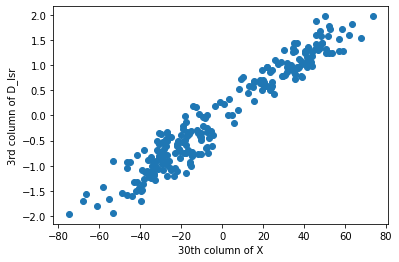

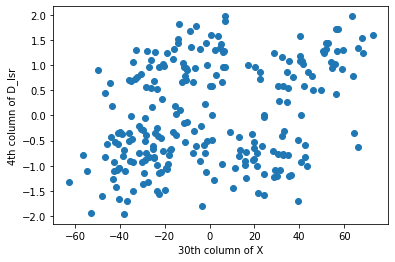

In [16]:
# plt.scatter(np.transpose(D_lsr)[2], np.transpose(X)[29])
# plt.show()
plt.scatter(D_lsr.T[2], X.T[9*21+2])
plt.ylabel("3rd column of D_lsr")
plt.xlabel("30th column of X")
plt.savefig(f"plots/2.1_scatter.png")
plt.show()
plt.scatter(D_lsr.T[3], X.T[9*21+2])
plt.ylabel("4th column of D_lsr")
plt.xlabel("30th column of X")
plt.savefig(f"plots/2.1_scatter1.png")
plt.show()

In [ ]:
X.shape

## Question 2.2

In [33]:
lmbda = 0.2*V
I = np.identity(6)
A_rr = abs(np.linalg.inv((Dt @ D) + lmbda*I) @ Dt @ X)
D_rr = X @ np.transpose(A_rr)

In [34]:
c_tlsr = []
c_trr = []

for i in range(6):
    c_tlsr.append(max(np.corrcoef(np.transpose(D_lsr), TC[i])[-1, :-1]))
    c_trr.append(max(np.corrcoef(np.transpose(D_rr), TC[i])[-1, :-1]))

In [35]:
print(sum(c_tlsr))
print(sum(c_trr))

5.174344135000088
5.243171962837975


In [20]:
lmbda = 1000
A_rr = np.linalg.inv((Dt @ D) + lmbda * I) @ Dt @ X
D_rr = X @ np.transpose(A_rr)

In [ ]:
plt.plot(A_rr[0])
plt.savefig(f"plots/2.2_Arr.png")
plt.show()

In [ ]:
plt.plot(A_lsr[0])
plt.savefig(f"plots/2.2_Alsr.png")
plt.show()

## Question 2.3

In [21]:
random.seed(2)

for i in range(10):
    Gt = np.random.normal(loc=0.0, scale=np.sqrt(0.25), size=(240,6))
    Gs = np.random.normal(loc=0.0, scale=np.sqrt(0.015), size=(6,441))
    X = np.matmul(np.transpose(TC) + Gt, SM + Gs)
    # Standardise
    X = np.transpose(X)
    for j in range(len(X)):
        X[j] = (X[j] - np.mean(X[j])) / np.std(X[j])
    X = np.transpose(X)
       

In [23]:
def compute_MSE_sum(rho, X):
    step = 1/(np.linalg.norm(D @ Dt)*1.1)
    thr = rho*N*step
    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    A_lr = np.zeros((x1*x2, nsrcs))

    for k in range(0,x1*x2):
        tmp = step * (Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
        A = Ao + tmp
        A = (1/(1+thr)) * np.sign(A)* np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr) 
        for i in range(10):
            Ao = A
            A = Ao + step*(Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
            A = (1/(1+thr)) * np.sign(A)*np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr)
        A_lr[k] =  np.reshape(A, (6))

    A_lr = abs(np.transpose(A_lr))
    D_lr = X @ np.transpose(A_lr)
    
#     return np.linalg.norm(X-(D_lr @ A_lr),ord=2)**2 /(N*V)

# #     s = 0
# #     for v in range(V):
# #         s += (np.linalg.norm(np.reshape(np.transpose(X)[v], (240,1)) - (D_lr @ np.reshape(np.transpose(A_lr)[v], (6,1))), ord=2)**2)/(N*V)
# #     MSE_sum = s
# #     return MSE_sum
        
    return sum(sum((X-(D_lr @ A_lr)))**2)/(N*V)



In [24]:
random.seed(2)

rho_MSE = []
for rho in list(np.arange(0.0,1.05,0.05)):
    MSE = []
    for i in range(10):
        Gt = np.random.normal(loc=0.0, scale=np.sqrt(0.25), size=(240,6))
        Gs = np.random.normal(loc=0.0, scale=np.sqrt(0.015), size=(6,441))
        X = np.matmul(np.transpose(TC) + Gt, SM + Gs)
        
        # Standardise
        X = np.transpose(X)
        for j in range(len(X)):
            X[j] = (X[j] - np.mean(X[j])) / np.std(X[j])
        X = np.transpose(X)
        
        MSE.append(compute_MSE_sum(rho, X))
    rho_MSE.append([rho,np.mean(MSE)])


In [ ]:
plt.plot(np.transpose(rho_MSE)[0], np.transpose(rho_MSE)[1])
plt.scatter(x=np.transpose(rho_MSE)[0], y=np.transpose(rho_MSE)[1])
plt.savefig(f"plots/2.3_rhoMSE.png")
plt.show()

## Question 2.4

In [25]:
def compute_Alr(rho, X):
    step = 1/(np.linalg.norm(D @ Dt)*1.1)
    thr = rho*N*step
    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    A_lr = np.zeros((x1*x2, nsrcs))

    for k in range(0,x1*x2):
        tmp = step * (Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
        A = Ao + tmp
        A = (1/(1+thr)) * np.sign(A)* np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr) 
        for i in range(10):
            Ao = A
            A = Ao + step*(Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
            A = (1/(1+thr)) * np.sign(A)*np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr)
        A_lr[k] =  np.reshape(A, (6))

    A_lr = np.transpose(A_lr)
    return A_lr
    

In [38]:
rho = 0.5
A_lr = abs(compute_Alr(rho, X))
D_lr = X @ np.transpose(A_lr)

c_trr = []
c_srr = []
c_tlr = []
c_slr = []

for i in range(6):
    c_trr.append(max(np.corrcoef(np.transpose(D_rr), TC[i])[-1, :-1]))
    c_srr.append(max(np.corrcoef(A_rr, SM[i])[-1, :-1]))
    c_tlr.append(max(np.corrcoef(np.transpose(D_lr), TC[i])[-1, :-1]))
    c_slr.append(max(np.corrcoef(A_lr, SM[i])[-1, :-1]))

In [39]:
print(sum(c_tlr))
print(sum(c_trr))
print()
print(sum(c_slr))
print(sum(c_srr))

5.369163019431115
5.243171962837975

4.832399958362078
3.575873270973431


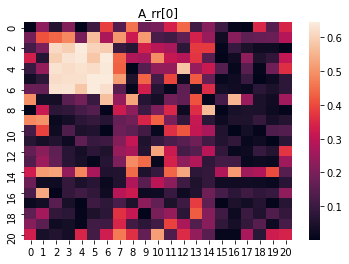

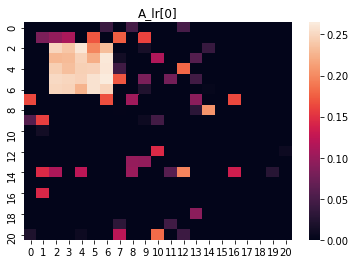

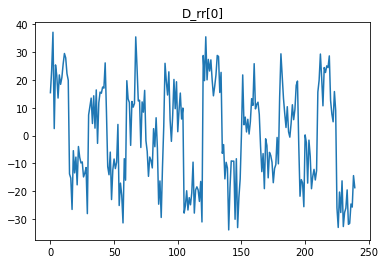

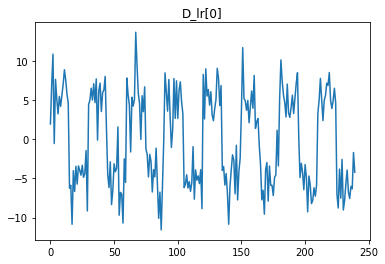

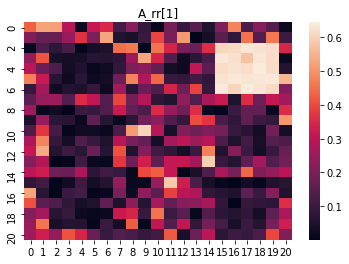

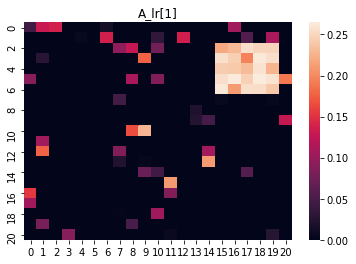

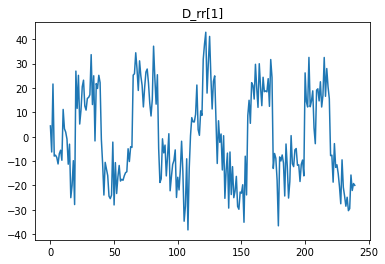

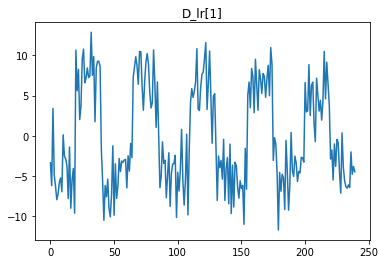

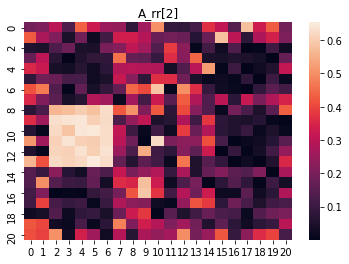

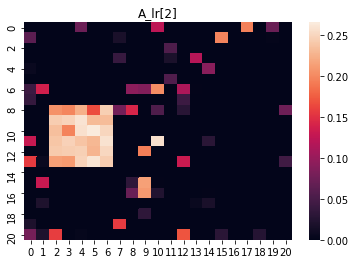

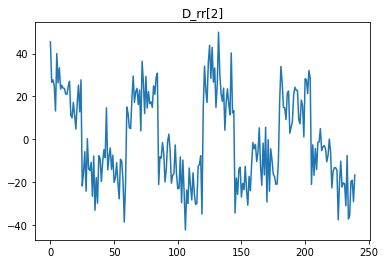

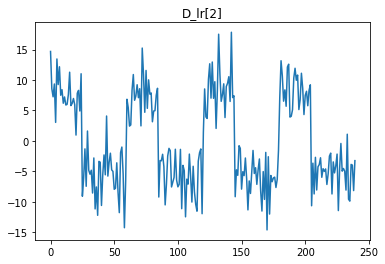

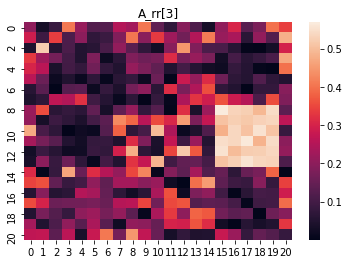

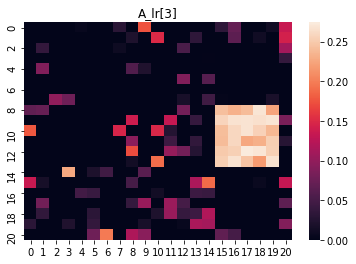

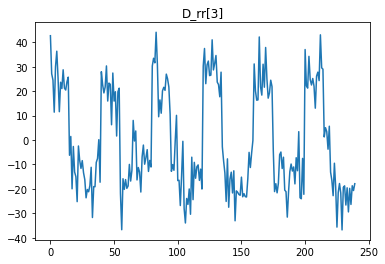

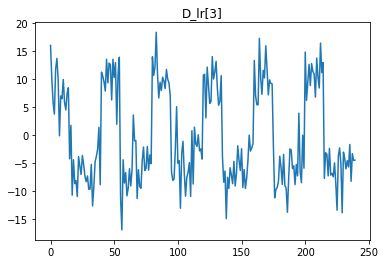

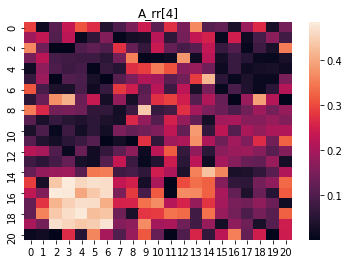

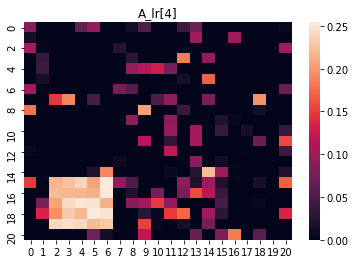

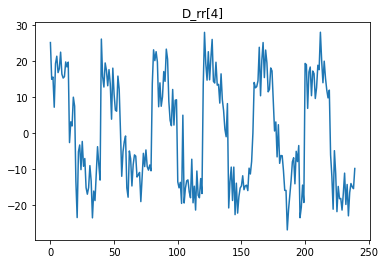

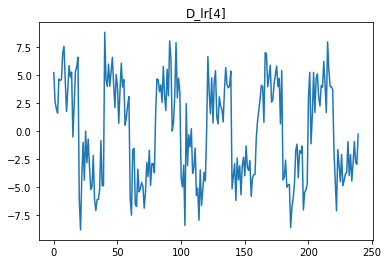

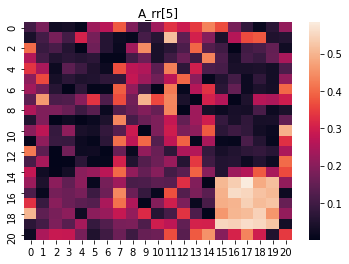

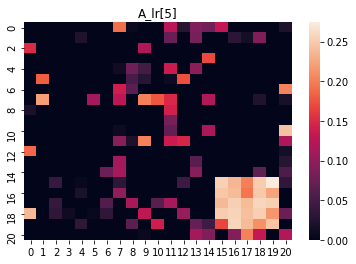

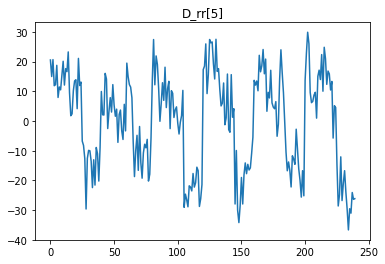

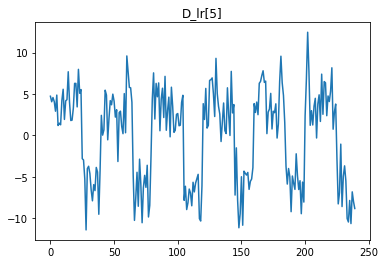

In [40]:
for i in range(6):
    sns.heatmap(np.reshape(A_rr[i], (21, 21)))
    plt.title(f"A_rr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Arr.png")
    plt.show()
    sns.heatmap(np.reshape(A_lr[i], (21, 21)))
    plt.title(f"A_lr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Alr.png")
    plt.show()
    plt.plot(np.transpose(D_rr)[i])
    plt.title(f"D_rr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Drr.png")
    plt.show()
    plt.plot(np.transpose(D_lr)[i])
    plt.title(f"D_lr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Dlr.png")
    plt.show()

In [ ]:
plt.plot(np.transpose(D_rr)[0])
plt.show()
plt.plot(np.transpose(D_lr)[0])
plt.show()

## Question 2.5

In [ ]:
# tmp = np.linalg.svd(X,5)


# U, sdiag, VH = np.linalg.svd(X,5)
# S = np.zeros((m, n))
# np.fill_diagonal(S, sdiag)
# V = VH.T.conj()

In [ ]:
np.linalg.svd(TC,5)[1]

In [ ]:
plt.plot(np.linalg.svd(TC,5)[1])
plt.ylabel("Eigen value")
plt.xlabel("Source")
plt.savefig(f"plots/2.5_eigenvalues.png")
plt.show()

In [ ]:
Z = np.linalg.svd(TC,5)[0]

In [ ]:
for i in range(6):
    plt.plot(TC[i])
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_TC.png")
    plt.show()
    plt.plot(Z[i])
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_Z.png")
    plt.show()

In [ ]:
def compute_Alr2(rho, X, D, Dt):
    step = 1/(np.linalg.norm(D @ Dt)*1.1)
    thr = rho*N*step
    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    A_lr = np.zeros((x1*x2, nsrcs))

    for k in range(0,x1*x2):
        tmp = step * (Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
        A = Ao + tmp
        A = (1/(1+thr)) * np.sign(A)* np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr) 
        for i in range(10):
            Ao = A
            A = Ao + step*(Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
            A = (1/(1+thr)) * np.sign(A)*np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr)
        A_lr[k] =  np.reshape(A, (6))

    A_lr = np.transpose(A_lr)
    return A_lr
    

In [ ]:
U, sdiag, VH = np.linalg.svd(TC,5)
Z = np.zeros((6, 240))
np.fill_diagonal(Z, sdiag)

In [ ]:
rho = 0.001
A_pcr = abs(compute_Alr2(rho,X,np.transpose(Z),Z))
D_pcr = X @ np.transpose(A_pcr)

In [ ]:
for i in range(6):
    sns.heatmap(np.reshape(A_pcr[i], (21, 21)))
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_A_pcr.png")
    plt.show()
    plt.plot(np.transpose(D_pcr)[i])
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_D_pcr.png")
    plt.show()

In [ ]:
plt.plot(np.transpose(D_pcr)[0])
plt.show()

In [ ]:
A_pcr.shape